## A2a : Comprehensive Regression Analysis of Food Consumption Data
                              

Name : Aakash Kathirvel

VID : V01110153

Date : 06/23/2024

Import necessary libraries

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

In [22]:
# Set the working directory and verify it
import os
os.chdir('C:/Users/Aakash/Desktop/SCMA')
print(os.getcwd())

C:\Users\Aakash\Desktop\SCMA


Load the Dataset

In [23]:
# Reading the file into Python
data = pd.read_csv("NSSO68.csv")

C:\Users\Aakash\AppData\Local\Temp\ipykernel_4520\2472617502.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("NSSO68.csv")


In [24]:
data.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [25]:
# Subset data for Meghalaya
subset_data = data[data['state_1'] == 'MEG'][['foodtotal_q', 'MPCE_MRP', 'ricepds_q', 'riceos_q', 'Meals_At_Home', 'Possess_ration_card', 'milkprott_q', 'No_of_Meals_per_day']]
print(subset_data)

       foodtotal_q  MPCE_MRP  ricepds_q   riceos_q  Meals_At_Home  \
17685    29.850725   3186.12   4.000000   6.000000           60.0   
17686    30.091070   3938.99   4.000000   3.600000           60.0   
17687    24.750700   2370.18   3.000000   5.000000           60.0   
17688    23.234217   2203.08   3.333333   1.666667           60.0   
17689    19.713667   2372.08   3.000000   6.000000           60.0   
...            ...       ...        ...        ...            ...   
49440    12.350262   1271.70   6.250000   1.250000           55.0   
49441    18.050125   2319.04   0.000000  10.000000           50.0   
49442    14.780352   1171.43   0.000000  10.000000           52.0   
49443    13.462625   1263.50   6.250000   2.500000           53.0   
49444    13.262831   1183.52   6.250000   2.500000           57.0   

       Possess_ration_card  milkprott_q  No_of_Meals_per_day  
17685                  1.0        5.350                  2.0  
17686                  1.0        6.340      

In [26]:
# Check for missing values
print(subset_data.isna().sum())

foodtotal_q            0
MPCE_MRP               0
ricepds_q              0
riceos_q               0
Meals_At_Home          8
Possess_ration_card    0
milkprott_q            0
No_of_Meals_per_day    1
dtype: int64


In [27]:
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
subset_data[['MPCE_MRP', 'ricepds_q', 'riceos_q', 'Meals_At_Home', 'Possess_ration_card', 'milkprott_q', 'No_of_Meals_per_day']] = imputer.fit_transform(subset_data[['MPCE_MRP', 'ricepds_q', 'riceos_q', 'Meals_At_Home', 'Possess_ration_card', 'milkprott_q', 'No_of_Meals_per_day']])

In [28]:
# Check for remaining missing values and infinite values
print(subset_data.isna().sum())
print(np.isinf(subset_data).sum())

foodtotal_q            0
MPCE_MRP               0
ricepds_q              0
riceos_q               0
Meals_At_Home          0
Possess_ration_card    0
milkprott_q            0
No_of_Meals_per_day    0
dtype: int64
foodtotal_q            0
MPCE_MRP               0
ricepds_q              0
riceos_q               0
Meals_At_Home          0
Possess_ration_card    0
milkprott_q            0
No_of_Meals_per_day    0
dtype: int64


In [29]:
# Drop any remaining rows with missing or infinite values just in case
subset_data = subset_data.replace([np.inf, -np.inf], np.nan).dropna()

Fitting the Regression Model

In [30]:
# Fit the regression model
X = subset_data[['MPCE_MRP', 'ricepds_q', 'riceos_q', 'Meals_At_Home', 'Possess_ration_card', 'milkprott_q']]
y = subset_data['foodtotal_q']
X = sm.add_constant(X) # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()

In [31]:
# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            foodtotal_q   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     256.0
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          1.35e-213
Time:                        19:19:15   Log-Likelihood:                -3224.4
No. Observations:                1259   AIC:                             6463.
Df Residuals:                    1252   BIC:                             6499.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.6249    

In [32]:
# Check for multicollinearity using Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

               feature         VIF
0                const  173.723804
1             MPCE_MRP    1.219951
2            ricepds_q    3.834495
3             riceos_q    3.253393
4        Meals_At_Home    1.053469
5  Possess_ration_card    1.557126
6          milkprott_q    1.182478


In [33]:
# Extract the coefficients from the model
coefficients = model.params
equation = f"y = {coefficients[0]:.2f}"
for i in range(1, len(coefficients)):
    equation += f" + {coefficients[i]:.6f}*x{i}"
print(equation)

y = -1.62 + 0.000724*x1 + 1.285188*x2 + 1.221971*x3 + 0.067029*x4 + 0.935385*x5 + 1.487613*x6


In [34]:
# Display the first value of each variable in subset_data
print(subset_data[['MPCE_MRP', 'ricepds_q', 'riceos_q', 'Meals_At_Home', 'Possess_ration_card', 'milkprott_q', 'foodtotal_q']].head(1))

       MPCE_MRP  ricepds_q  riceos_q  Meals_At_Home  Possess_ration_card  \
17685   3186.12        4.0       6.0           60.0                  1.0   

       milkprott_q  foodtotal_q  
17685         5.35    29.850725  


Performing Regression Diagnostics

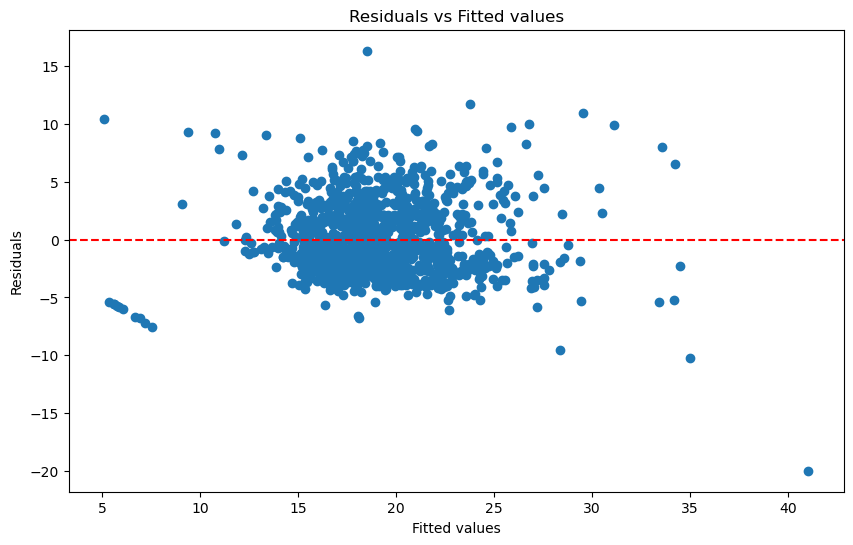

In [35]:
# Residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

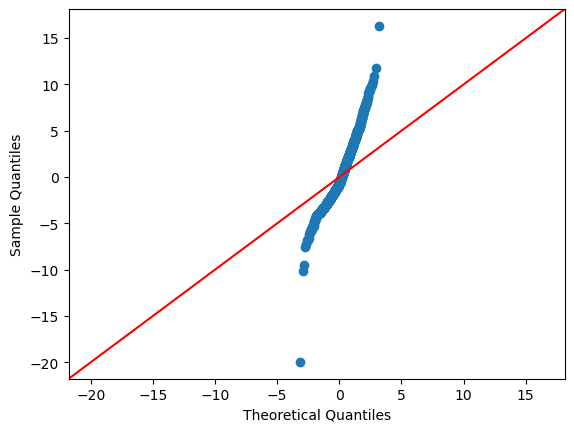

In [36]:
# Normal Q-Q plot
sm.qqplot(model.resid, line='45')
plt.show()


Correct the Model

In [38]:
# Remove variables with high VIF
threshold = 5  # Common threshold is 5 or 10
high_vif_features = vif_data[vif_data['VIF'] > threshold]['feature']
X_corrected = X.drop(columns=high_vif_features)

Re evaluating on the corrected model

In [39]:
# Fit the corrected model
model_corrected = sm.OLS(y, X_corrected).fit()

In [40]:
# Print the summary of the corrected regression
print(model_corrected.summary())

                                 OLS Regression Results                                
Dep. Variable:            foodtotal_q   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              7835.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):                        0.00
Time:                        19:27:20   Log-Likelihood:                         -3225.4
No. Observations:                1259   AIC:                                      6463.
Df Residuals:                    1253   BIC:                                      6494.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [41]:
# Extract the coefficients from the corrected model
coefficients_corrected = model_corrected.params
equation_corrected = f"y = {coefficients_corrected[0]:.2f}"
for i in range(1, len(coefficients_corrected)):
    equation_corrected += f" + {coefficients_corrected[i]:.6f}*x{i}"
print(equation_corrected)

y = 0.00 + 1.254363*x1 + 1.200285*x2 + 0.046073*x3 + 0.834782*x4 + 1.489296*x5


Perform regression diagnostics on the corrected model

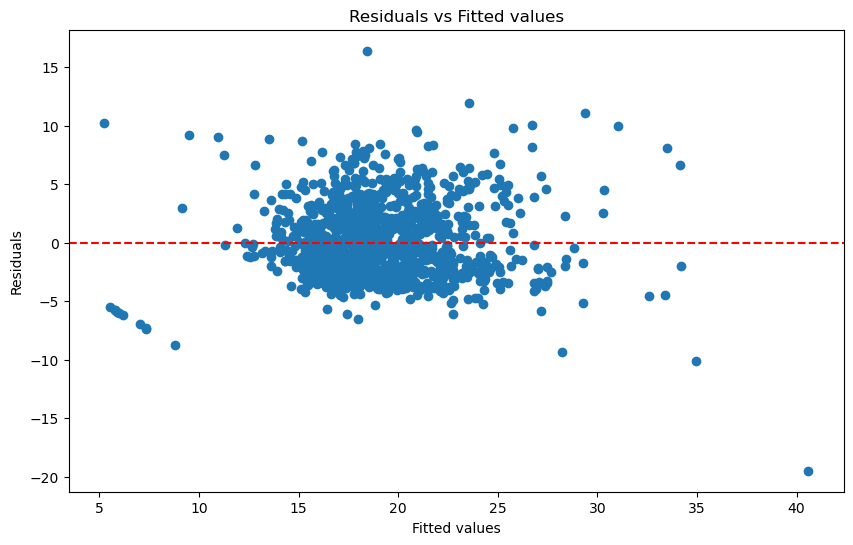

In [42]:
# Residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(model_corrected.fittedvalues, model_corrected.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

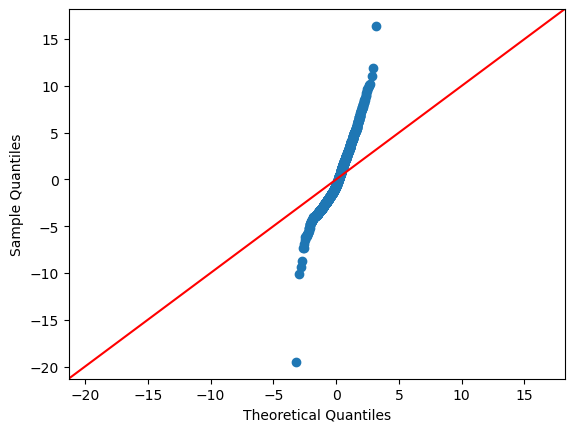

In [43]:
# Normal Q-Q plot
sm.qqplot(model_corrected.resid, line='45')
plt.show()

In [45]:
# Display the first value of each variable in subset_data
print(subset_data[['MPCE_MRP', 'ricepds_q', 'riceos_q', 'Meals_At_Home', 'Possess_ration_card', 'milkprott_q', 'foodtotal_q']].head(1))

       MPCE_MRP  ricepds_q  riceos_q  Meals_At_Home  Possess_ration_card  \
17685   3186.12        4.0       6.0           60.0                  1.0   

       milkprott_q  foodtotal_q  
17685         5.35    29.850725  
